In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight') #https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_excel("C:\\Users\\Sundaram\\Downloads\\cust_data.xlsx")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(30000, 38)

set of rules for elimination of data points.
1. find the brand with minimum hit
2. order=0 and brand=1 0r 2 eliminate
3. map each column with value upto median="1" and value above median="2" and 0="0" 


In [6]:
df["Samsung"].sum()

6688

In [7]:
#To see how many hits each brand has
brands=df.drop(columns=["Gender","Orders","Cust_ID"])
cols=brands.columns
bran=[]
summ=[]
for col in cols:
    bran.append(col)
    summ.append(brands[col].sum())
total=pd.DataFrame(list(zip(bran,summ)),columns=["brand_name","sum_of_search"])

total

,brand_name,sum_of_search
0,Jordan,8023
1,Gatorade,7570
2,Samsung,6688
3,Asus,4840
4,Udis,4306
5,Mondelez International,4193
6,Wrangler,3208
7,Vans,3343
8,Fila,2828
9,Brooks,4204


In [8]:
df.Gender.value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [9]:
df.Gender=df.Gender.fillna("T")
df.head()


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,T,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [10]:
df.Gender.value_counts()

F    22054
M     5222
T     2724
Name: Gender, dtype: int64

# since majority of gender is female, let us map T and F with 1 and M with 2

In [11]:
df.Gender = df.Gender.map({'M':2,'F':1,'T':1})
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,2,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,2,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [12]:
df.dtypes

Cust_ID                   int64
Gender                    int64
Orders                    int64
Jordan                    int64
Gatorade                  int64
Samsung                   int64
Asus                      int64
Udis                      int64
Mondelez International    int64
Wrangler                  int64
Vans                      int64
Fila                      int64
Brooks                    int64
H&M                       int64
Dairy Queen               int64
Fendi                     int64
Hewlett Packard           int64
Pladis                    int64
Asics                     int64
Siemens                   int64
J.M. Smucker              int64
Pop Chips                 int64
Juniper                   int64
Huawei                    int64
Compaq                    int64
IBM                       int64
Burberry                  int64
Mi                        int64
LG                        int64
Dior                      int64
Scabal                    int64
Tommy Hi

In [13]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [14]:
#to see how many hits each customer has on a total.
df = df.assign(total_search=df[['Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']].sum(axis=1))
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
0,1,2,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,2,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,1,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29997,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29998,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29998,29999,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
df["total_search"].unique()

array([  2,  18,   5,  16,   7,   6,  14,   4,   9,   1,   3,  20,  10,
         8,  13,  28,  17,  12,  47,  37,  25,  30,  63,  11,  26,  23,
        24,  29,  21,  15,  22,  32,  34,  19, 109,  35,  81,  27,  40,
        53,  36,  42,  39,  33,  38, 127,  54,  46,  55,  41,  48,  50,
        65,  43,   0,  31,  45,  57,  64, 160,  83,  68,  49,  71,  61,
        73,  58,  59,  66,  44,  98,  51,  74,  69,  60,  52,  70,  96,
       136,  76,  79,  85,  87], dtype=int64)

In [16]:
df.shape

(30000, 39)

In [17]:
#delete rows in which order=0 and total_search=1
df = df.loc[(df["total_search"] >1) & (df["Orders"] > 0)]
df.shape

(20303, 39)

In [18]:

#delete rows in which order=0 and total_search<2
df = df.loc[(df["total_search"] >2) & (df["Orders"] > 0)]
df.shape

(17654, 39)

In [19]:
df.describe()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,...,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000
mean,15508.392262,1.160870,5.527019,0.351139,0.332956,0.294438,0.213040,0.185001,0.174521,0.137476,...,0.339470,0.467203,0.199898,0.099128,0.071032,0.237623,0.147955,0.112609,0.087686,8.678713
std,8622.505224,0.367421,3.085946,0.927933,0.807715,1.066888,0.840937,0.729554,0.596887,0.582187,...,0.790549,0.834063,0.557444,0.437735,0.336335,0.727781,0.503179,0.455219,0.434992,7.008252
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,8239.250000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,15753.500000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,22981.750000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,30000.000000,2.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,...,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,12.000000,8.000000,16.000000,160.000000


In [41]:
df["Asus"].mean()

0.21303953778180582

In [20]:
df=df.drop(columns=["total_search"])
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Cust_ID                      0
Gender                    2840
Orders                       0
Jordan                    3616
Gatorade                  3753
Samsung                   2313
Asus                      1842
Udis                      1800
Mondelez International    2272
Wrangler                  1372
Vans                      1515
Fila                      1088
Brooks                    2437
H&M                        632
Dairy Queen               2315
Fendi                     2244
Hewlett Packard           2218
Pladis                    1467
Asics                     3255
Siemens                    659
J.M. Smucker              1554
Pop Chips                 3639
Juniper                    884
Huawei                    3181
Compaq                    1655
IBM                        407
Burberry                  1066
Mi                        1832
LG                        1326
Dior                      3946
Scabal                     572
Tommy Hilfiger            2625
Holliste

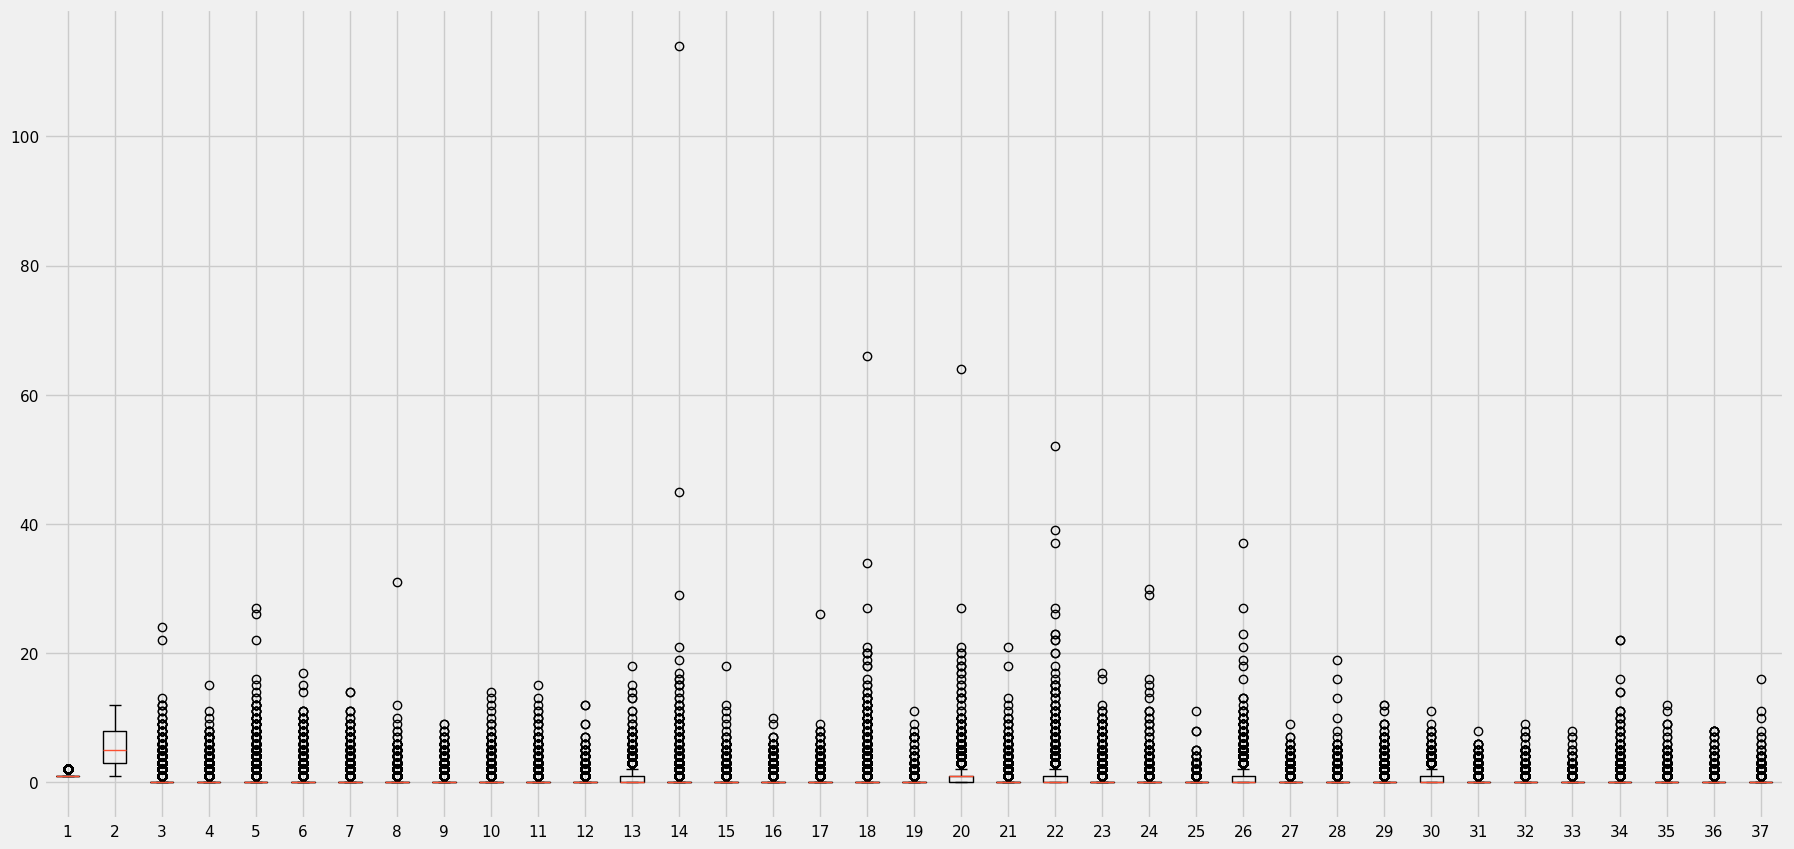

In [21]:
plt.figure(figsize=(20,10))
df_=df.drop(columns=["Cust_ID"])

plt.boxplot(df_)
plt.show()

In [42]:
'Jordan'

q3= df['Jordan'].quantile([0.75]).values
if df['Jordan']>=q3:
    df['Jordan'][df['Jordan']>=q3]=df['Jordan'].mean()
else:
    df['Jordan']=df['Jordan']
    
plt.boxplot(df['Jordan'])
plt.show()

ValueError: ('Lengths must match to compare', (17654,), (1,))

In [35]:
'Gatorade'

Q1 = df['Gatorade'].quantile(0.25)
Q3 = df['Gatorade'].quantile(0.75)
IQR = Q3 - Q1
#low= (Q1 - (1.5 * IQR))
up= (Q3 + (1.5 * IQR))
    

#q3= df['Gatorade'].quantile([0.75]).values
print(Q3)
print(up)
print(df['Gatorade'].mean)

df['Gatorade'][df['Gatorade']>=up]=df['Gatorade'].mean
#df[col][df[col] <= percentiles[0]] = percentiles[0]

TypeError: '<' not supported between instances of 'method' and 'method'

In [43]:
'Samsung'

Q1 = df['Samsung'].quantile(0.25)
Q3 = df['Samsung'].quantile(0.75)
IQR = Q3 - Q1
#low= (Q1 - (1.5 * IQR))
up= (Q3 + (1.5 * IQR))
    

#q3= df['Gatorade'].quantile([0.75]).values
print(Q3)
print(up)
print(df['Samsung'].mean())

df['Samsung'][df['Samsung']>=up]=df['Samsung'].mean()

TypeError: '<' not supported between instances of 'method' and 'method'

In [21]:
new_df=df.drop(columns=['Cust_ID', 'Gender', 'Orders'])
def cap_data(df):
    for col in df.columns:
        if (df[col].dtype)=='int64':
        #if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.25,0.50,0.75]).values
            #df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[2]] = df[col].mean
        else:
            df[col]=df[col]
    return df

final_df=cap_data(new_df)




In [22]:
final_df


RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded

In [23]:
final_df.describe()

RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded

In [171]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft                     0
dtype: int64

In [166]:
def outliers(col):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    low= (Q1 - (1.5 * IQR))
    up= (Q3 + (1.5 * IQR))
    return low,up
colu=['Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']
for col in colu:
    if df[col].dtype!="object":
        low,up=outliers(df[col])
        df[col]=np.where((df[col]>up) , np.nan, df[col])
        df[col]=df[col].fillna(value=df[col].mean)

ValueError: Can only compare identically-labeled Series objects

In [104]:


colu=['Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft']

for col in colu:
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    low= Q1 - (1.5 * IQR)
    up= Q3 + (1.5 * IQR)
    
    
    avg=df[col].mean()
    #for row in df[col]:
        #mask = (row <= low) & (row >= up)
    mask = (df[col] >= up)
    df[col] = df[col].where(mask, avg)
    '''
    maxi=df[col].max()+1
    (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)
    
    criteria = [df[col].between(1, avg), df[col].between(avg,maxi)]
    values = [1, 2]

    df[col] = np.select(criteria, values, 0)'''

ValueError: Can only compare identically-labeled Series objects

In [ ]:
df.describe()

In [46]:
df.describe()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total_search
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,...,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000
mean,15508.392262,1.160870,5.527019,0.281523,0.283562,0.194630,0.150051,0.140252,0.155092,0.110117,...,0.293984,0.416393,0.183641,0.087686,0.066274,0.204033,0.134870,0.101563,0.075903,8.678713
std,8622.505224,0.367421,3.085946,0.596390,0.587473,0.532906,0.467945,0.444044,0.428768,0.403487,...,0.590346,0.655973,0.468859,0.341461,0.289202,0.496808,0.402639,0.364928,0.324624,7.008252
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,8239.250000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,15753.500000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,22981.750000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,30000.000000,2.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,160.000000


In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Cust_ID                      0
Gender                    2840
Orders                       0
Jordan                    3616
Gatorade                  3753
Samsung                   2313
Asus                      1842
Udis                      1800
Mondelez International    2272
Wrangler                  1372
Vans                      1515
Fila                      1088
Brooks                    2437
H&M                          0
Dairy Queen               2315
Fendi                     2244
Hewlett Packard           2218
Pladis                    1467
Asics                     3255
Siemens                    659
J.M. Smucker                 0
Pop Chips                 3639
Juniper                      0
Huawei                    3181
Compaq                    1655
IBM                        407
Burberry                     0
Mi                        1832
LG                        1326
Dior                      3946
Scabal                       0
Tommy Hilfiger            2625
Holliste

In [19]:
df=df.drop(columns=["total_search"])
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [21]:
df.describe()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,...,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000
mean,15508.392262,1.160870,5.527019,0.281523,0.283562,0.194630,0.150051,0.140252,0.155092,0.110117,...,0.096522,0.293984,0.416393,0.183641,0.087686,0.066274,0.204033,0.134870,0.101563,0.075903
std,8622.505224,0.367421,3.085946,0.596390,0.587473,0.532906,0.467945,0.444044,0.428768,0.403487,...,0.360605,0.590346,0.655973,0.468859,0.341461,0.289202,0.496808,0.402639,0.364928,0.324624
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8239.250000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15753.500000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22981.750000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,2.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [166]:
df["Samsung"].unique()

array([ 0,  2,  1,  4,  3,  5,  6,  8,  7,  9, 14, 10, 22, 13, 12, 11, 15,
       26, 27, 16], dtype=int64)

In [114]:
df.dtypes

Cust_ID                   int64
Gender                    int64
Orders                    int64
Jordan                    int64
Gatorade                  int64
Samsung                   int64
Asus                      int64
Udis                      int64
Mondelez International    int64
Wrangler                  int64
Vans                      int64
Fila                      int64
Brooks                    int64
H&M                       int64
Dairy Queen               int64
Fendi                     int64
Hewlett Packard           int64
Pladis                    int64
Asics                     int64
Siemens                   int64
J.M. Smucker              int64
Pop Chips                 int64
Juniper                   int64
Huawei                    int64
Compaq                    int64
IBM                       int64
Burberry                  int64
Mi                        int64
LG                        int64
Dior                      int64
Scabal                    int64
Tommy Hi

there are a lot many outliers in this data, which will interfere in successful clustering, but we cannot treat outliers in this case


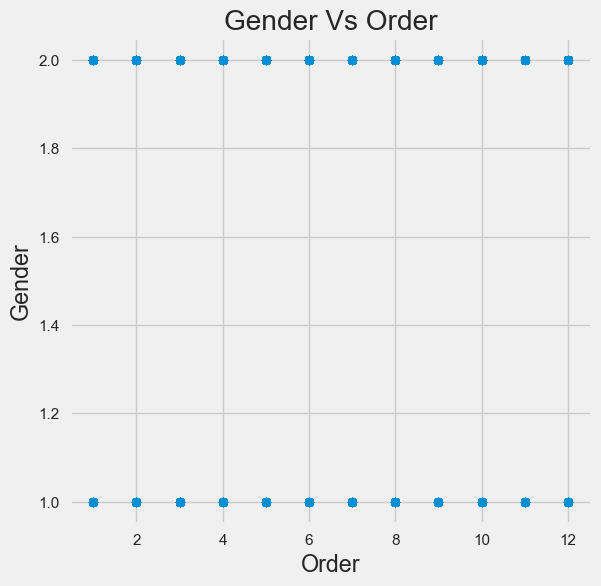

In [116]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 2], df.iloc[:, 1])
plt.xlabel('Order')
plt.ylabel('Gender')
plt.title('Gender Vs Order');

# Splitting is not needed in k means but scaling is mandatory

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df) # standardise data


from sklearn.cluster import KMeans
km = KMeans(n_clusters=2) # applying k = 2 for now
km.fit(X_std) # fit the data - identify pattern, does everything





df['clusters'] = km.fit_predict(X_std)
df.head()

df.clusters.unique()

df.clusters.value_counts()

km.labels_ # measures how tight my groups are. 


km.inertia_

# we have more than 2 columns, so visualisation will be very difficult

Text(0.5, 1.0, 'Visualization of clustered data')

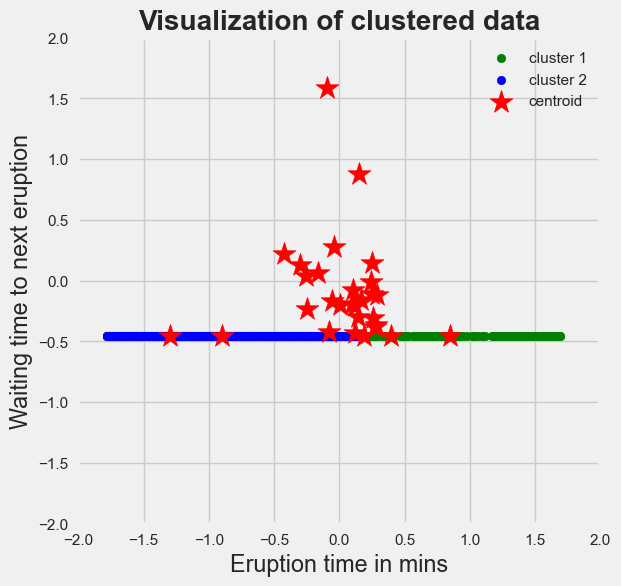

In [168]:

centroids = km.cluster_centers_ # final centroid points
# #Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')

# Elbow plot

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df) # standardise data


from sklearn.cluster import KMeans

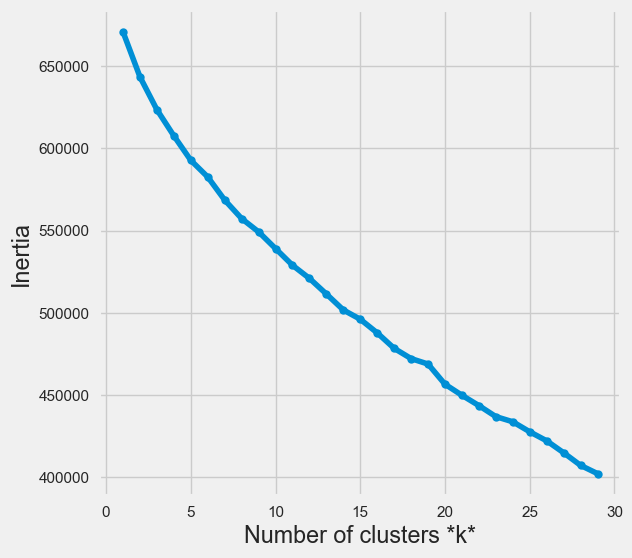

In [171]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

In [126]:
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_df = PCA(n_components=pca_num_components).fit_transform(df.iloc[:,0:12])
results = pd.DataFrame(reduced_df,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

KeyError: 'clusters'

As we can't actually view the elbow in this plot(due to high dimentionality), we shall use yellow brick's elbow plot viewer and silhoute  score to find the k value.

In [76]:
! pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


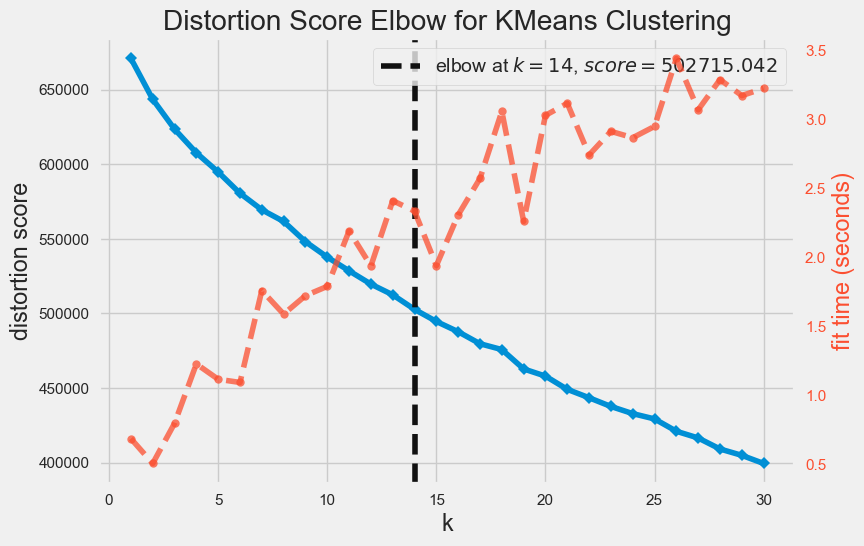

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
km = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(km, k=(1,31))
elb_visualizer.fit(X_std)    
elb_visualizer.show()  


In [174]:
np.unique(km.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

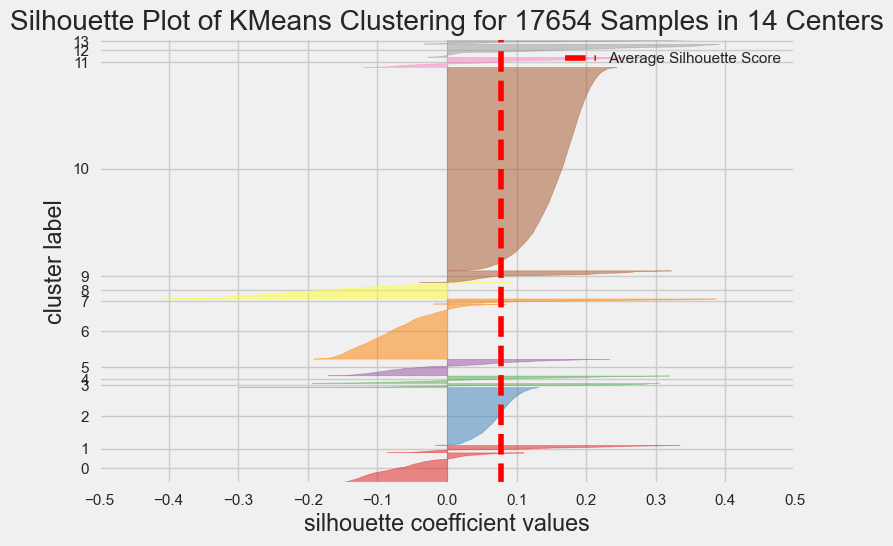

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 17654 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [173]:
model_14clust = KMeans(n_clusters = 14, random_state=4)

sil_visualizer = SilhouetteVisualizer(model_14clust)
sil_visualizer.fit(X_std)    
sil_visualizer.show()

In [175]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = range(2,21)
sil=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3638072592548031
For n_clusters = 3 The average silhouette_score is : 0.08655415858552735
For n_clusters = 4 The average silhouette_score is : 0.09027952463973239
For n_clusters = 5 The average silhouette_score is : 0.08016131472269046
For n_clusters = 6 The average silhouette_score is : 0.08458512676365554
For n_clusters = 7 The average silhouette_score is : 0.030533901817986212
For n_clusters = 8 The average silhouette_score is : 0.08577812655700622
For n_clusters = 9 The average silhouette_score is : 0.07395256577093796
For n_clusters = 10 The average silhouette_score is : 0.07670716893616437
For n_clusters = 11 The average silhouette_score is : 0.04016976258085869
For n_clusters = 12 The average silhouette_score is : 0.07335629709912904
For n_clusters = 13 The average silhouette_score is : 0.04125634500936079
For n_clusters = 14 The average silhouette_score is : 0.07991280838406892
For n_clusters = 15 The average silhouette_sco

the silhoutte score is at 0.05, when k=21 which is not so good. A good silhoutte score should approach 1.0 . To go near 1.0, let us reducethe k value. values near 0 denotes overapping clusters.

when k=19, the silhoutte score is <0.5. So let us fix the k value at 20, at which the silhoutte score is >0.5 

# Final Modeling

In [36]:
km = KMeans(n_clusters=20) # applying k = 20 from elbow and silhoutte score
km.fit(X_std) # fit the data - identify pattern, does everything
df['clusters'] = km.fit_predict(X_std)




In [37]:
df.clusters.unique()

array([19,  8,  0, 10, 15, 16, 14, 18,  1,  6, 11, 13,  2, 12,  7,  4,  5,
        3,  9, 17])

In [38]:
df.clusters.value_counts()

0     8988
16    6824
19    4118
1     2449
15     798
12     669
6      621
8      603
14     597
18     540
17     537
3      534
7      498
10     486
2      484
5      452
4      343
13     258
11     176
9       25
Name: clusters, dtype: int64

In [39]:
#if we want to view the cluster do the below steps
centroids = km.cluster_centers_ # final centroid points
centroids

array([[-5.21353719e-02, -4.59076762e-01, -8.02322798e-01,
        -1.41324208e-01, -1.89379190e-01, -1.49457019e-01,
        -1.13335093e-01, -8.08189372e-02, -1.33514839e-01,
        -1.35001631e-01, -1.35516262e-01, -1.14940246e-01,
        -1.21883171e-01, -1.32550949e-01, -9.26666335e-02,
        -9.17118223e-02, -1.68646266e-01, -1.14917705e-01,
        -1.18203045e-01, -1.00494752e-01, -1.09156719e-01,
        -1.02579618e-01, -6.58483079e-02, -1.13376926e-01,
        -3.65248671e-02, -6.99501725e-02, -1.70955092e-01,
        -1.46665343e-01, -1.44453078e-01, -1.48744235e-01,
        -1.14612408e-01, -1.98672981e-01, -1.42206846e-01,
        -1.33202676e-01, -8.34630509e-02, -1.22009222e-01,
        -9.75567857e-02, -1.24531325e-01],
       [ 2.18484741e-01, -3.97767782e-01,  3.50607807e-02,
         5.10952335e-01,  2.78270668e-01, -8.42939356e-02,
        -2.12666916e-02,  6.06775350e-01,  8.75808294e-03,
        -8.63234137e-02, -9.84970160e-03, -5.84160232e-02,
         1.95

In [41]:
km.labels_ # measures how tight my groups are. 

array([19,  8, 19, ..., 19, 19,  0])

In [40]:
km.inertia_

771942.7556163359